In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("data_interview.csv")
df.head()

,STT,date_time,event_name,level,user,day_diff,day0,mode_game,win,reason_to_die,quantity,version
0,40,10/28/2023,game_start,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0,10/28/2023,normal,NaN,NaN,0,1.6.0
1,41,10/28/2023,game_start,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0,10/28/2023,normal,NaN,NaN,0,1.6.0
2,42,10/28/2023,game_start,2,1cffd052-4616-4d29-bfd5-950e23b763d4,0,10/28/2023,normal,NaN,NaN,0,1.6.0
3,43,10/28/2023,game_start,3,1cffd052-4616-4d29-bfd5-950e23b763d4,0,10/28/2023,normal,NaN,NaN,0,1.6.0
4,44,10/28/2023,game_start,4,1cffd052-4616-4d29-bfd5-950e23b763d4,0,10/28/2023,normal,NaN,NaN,0,1.6.0


In [3]:
df['version'].value_counts()

version
1.6.0    440614
1.5.2    357718
Name: count, dtype: int64

In [4]:
df_152 = df[df['version'] == '1.5.2']
df_160 = df[df['version'] == '1.6.0']


In [5]:
df_152[df_152['mode_game'] == 'tutorial']['quantity'].value_counts()

quantity
-1    6988
 1    6658
 2    6573
 3    6535
 4    6508
-2    6497
 0     359
Name: count, dtype: int64

In [6]:
df_160[df_160['mode_game'] == 'tutorial']['quantity'].value_counts()

quantity
-1    7224
 1    6885
 2    6811
 3    6782
 4    6759
 5    6749
 6    6736
 7    6726
 8    6713
-2    6712
 0     372
Name: count, dtype: int64

So basically:
- version 1.5.2: Have 4 step to complete tutorial.
- Version 1.6.0: Have 8 step to complete tutorial.


In [7]:
len(df_160[df_160['mode_game'] == 'tutorial']), len(df_152[df_152['mode_game'] == 'tutorial'])

(68469, 40118)

### Tutorial complete rate

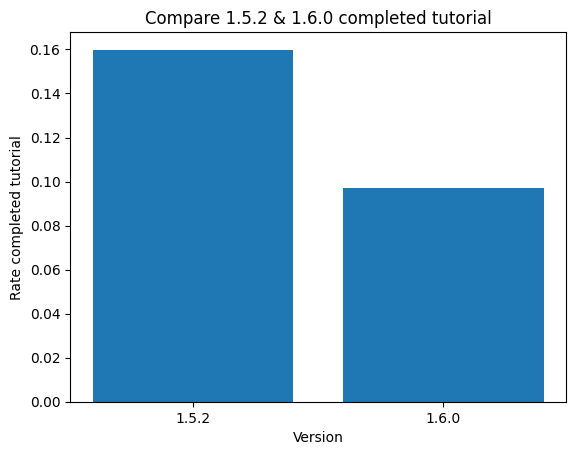

In [8]:
def completed_tutorial_rate(df_152, df_160):
    tutorial_152 = df_152[(df_152['mode_game'] == 'tutorial') & (df_152['day_diff'] == 0)]
    tutorial_160 = df_160[(df_160['mode_game'] == 'tutorial') & (df_160['day_diff'] == 0)]

    completed_152 = int(tutorial_152[tutorial_152['mode_game'] == 'tutorial']['quantity'].value_counts().get(-2))
    completed_160 = int(tutorial_160[tutorial_160['mode_game'] == 'tutorial']['quantity'].value_counts().get(-2))
    rate_152 = completed_152 / len(df_152[df_152['mode_game'] == 'tutorial'])
    rate_160 = completed_160 / len(df_160[df_160['mode_game'] == 'tutorial'])
    
    plt.bar(['1.5.2', '1.6.0'], [rate_152, rate_160])
    plt.xlabel('Version')
    plt.ylabel('Rate completed tutorial')
    plt.title('Compare 1.5.2 & 1.6.0 completed tutorial')
    plt.show()


completed_tutorial_rate(df_152, df_160)

    
    

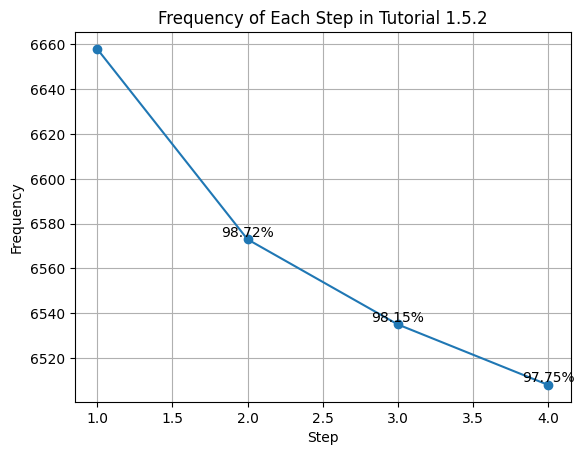

In [9]:
def frequence_step(df):
    if df['version'].unique() == '1.5.2':
        steps = [1, 2, 3, 4]
    else:
        steps = [1, 2, 3, 4, 5, 6, 7, 8]
    
    tutorial = df[(df['mode_game'] == 'tutorial') & (df['quantity'].isin(steps))]
    step_counts = tutorial['quantity'].value_counts().sort_index()
    
    plt.plot(step_counts.index, step_counts.values, marker='o')
    for i in range(1, len(step_counts)):
        percentage = (step_counts.values[i] / step_counts.values[0]) * 100
        plt.text(step_counts.index[i], step_counts.values[i], f'{percentage:.2f}%', ha='center', va='bottom')
    
    plt.xlabel('Step')
    plt.ylabel('Frequency')
    plt.title('Frequency of Each Step in Tutorial {}'.format(df['version'].unique()[0]))
    plt.grid(True)
    plt.show()

frequence_step(df_152)

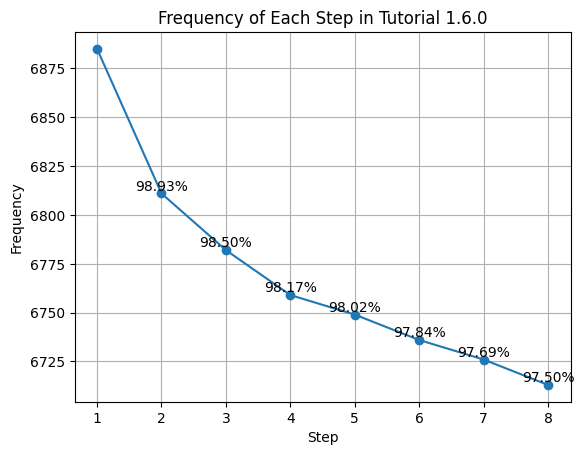

In [10]:
frequence_step(df_160)

#### Win rate

In [11]:

def win_rate_by_level(df):
    game_end = df[(df['event_name'] == 'game_end') & (df['level'] <= 10)]
    win_rate = game_end.groupby(['level', 'version'])['win'].mean()
    return win_rate.unstack()


win_rate = win_rate_by_level(df)
win_rate

version,1.5.2,1.6.0
level,,
1,0.749822,0.772382
2,0.988964,0.991266
3,0.963910,0.968246
4,0.790999,0.764796
5,0.748328,0.717957
6,0.766357,0.715394
7,0.377347,0.378522
8,0.473021,0.490144
9,0.725389,0.735905


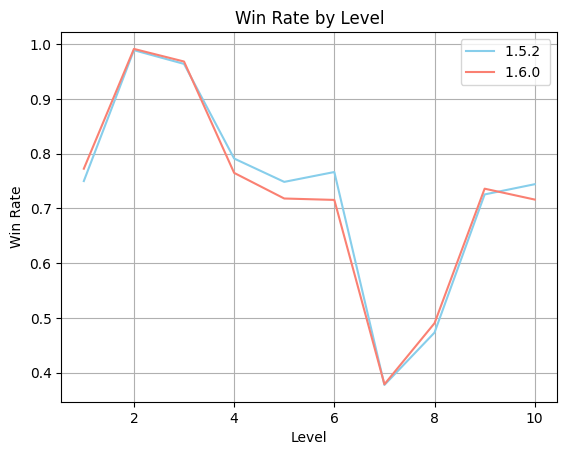

In [12]:

plt.plot(win_rate.index, win_rate['1.5.2'], label='1.5.2 ', color='skyblue')
plt.plot(win_rate.index, win_rate['1.6.0'], label='1.6.0 ', color='salmon')
plt.xlabel('Level')
plt.ylabel('Win Rate')
plt.title('Win Rate by Level')
plt.legend()
plt.grid(True)
plt.show()

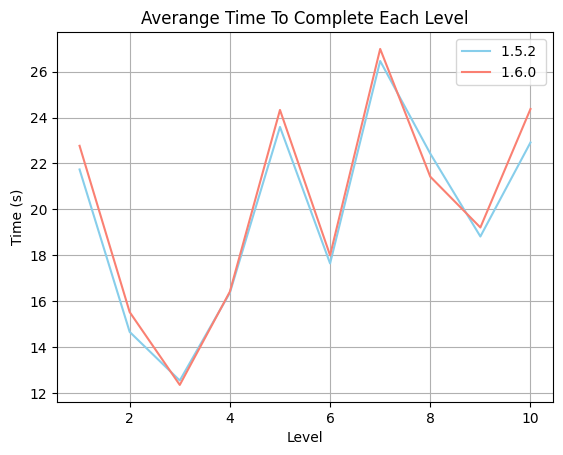

In [13]:
def time_complete_level(df):
    game_end = df[(df['event_name'] == 'game_end') & (df['level'] <= 10)]
    time_complete = game_end.groupby(['level', 'version'])['quantity'].mean()
    return time_complete.unstack()

time_complete = time_complete_level(df)

plt.plot(time_complete.index, time_complete['1.5.2'], label='1.5.2 ', color='skyblue')
plt.plot(time_complete.index, time_complete['1.6.0'], label='1.6.0 ', color='salmon')
plt.xlabel('Level')
plt.ylabel('Time (s)')
plt.title('Averange Time To Complete Each Level')
plt.legend()
plt.grid(True)
plt.show()


#### Lose rate

In [14]:
def average_time_lose(df):
    game_end = df[(df['event_name'] == 'game_end') & (df['level'] <= 10)]
    game_end = game_end[game_end['quantity'] < 300]  # Remove outliers with quantity >= 300 (that mean they afk or something)
    time_lose = game_end[game_end['win'] == False].groupby(['level', 'version'])['quantity'].mean()
    return time_lose.unstack()

time_lose = average_time_lose(df)
time_lose



version,1.5.2,1.6.0
level,,
1,21.571226,22.478873
2,20.231884,18.592593
3,15.145729,14.890710
4,14.612561,14.615385
5,23.180851,22.911232
6,17.271318,16.976823
7,22.647743,22.373770
8,18.402603,18.235552
9,18.202429,18.308365


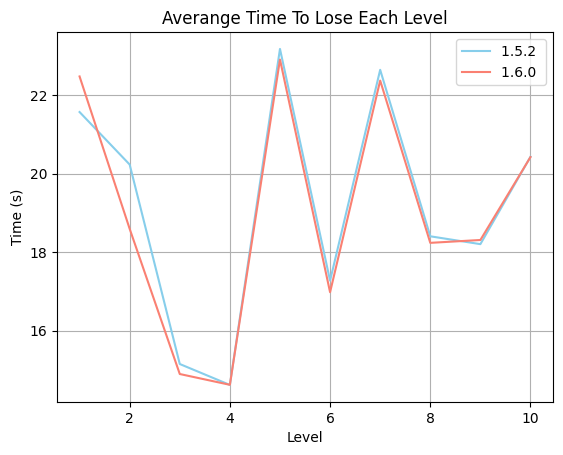

In [15]:
plt.plot(time_lose.index, time_lose['1.5.2'], label='1.5.2 ', color='skyblue')
plt.plot(time_lose.index, time_lose['1.6.0'], label='1.6.0 ', color='salmon')
plt.xlabel('Level')
plt.ylabel('Time (s)')
plt.title('Averange Time To Lose Each Level')
plt.legend()
plt.grid(True)
plt.show()


In [55]:
engagement_data = df[
    (df['event_name'] == 'user_engagement') & 
    (df['mode_game'] == 'ss')
]

# Analyze first 7 days 
session_stats = (engagement_data[engagement_data['day_diff'] <= 7]
    .groupby(['version', 'user'])
    .agg({
        'day_diff': 'max',  # Last day of activity
        'date_time': 'count'  # Number of sessions
    })
    .reset_index())

session_stats


,version,user,day_diff,date_time
0,1.5.2,00245d84-12e2-4f38-8811-409b77163367,1,4
1,1.5.2,003168a9-93ce-4015-a68f-a781a4fea1bd,0,1
2,1.5.2,0033fefb-bc1c-4a81-9edf-ed22bdc7d3c8,7,4
3,1.5.2,0035cf01-160b-455e-b843-9e45f7067562,0,1
4,1.5.2,0036d4b1-784e-43da-9695-b4f7ba54a305,0,1
...,...,...,...,...
13590,1.6.0,ffeea974101e69bdaf99912ca2eec4d8,1,2
13591,1.6.0,fff0c35250fd87a0fb8d5fc5bf22e42a,2,7
13592,1.6.0,fff213aa-f553-4c4c-b3e6-23fa9a449bdb,1,4
13593,1.6.0,fff9bb21-cf6d-4bda-8f8e-eea7bf8b4931,0,1


In [57]:
# Calculate statistics for each version
version_stats = session_stats.groupby('version').agg({
    'day_diff': ['mean', 'count', 'std'],
    'date_time': 'mean'
}).round(2)

version_stats

day_diff             date_time
            mean count   std      mean
version                               
1.5.2       0.98  6669  1.75      2.51
1.6.0       1.25  6926  2.00      2.83

In [59]:
from scipy import stats
import numpy as np

v152_data = session_stats[session_stats['version'] == '1.5.2']['day_diff']
v160_data = session_stats[session_stats['version'] == '1.6.0']['day_diff']

# Z-test
def z_test(data1, data2):
    n1, n2 = len(data1), len(data2)
    mean1, mean2 = data1.mean(), data2.mean()
    std1, std2 = data1.std(), data2.std()
    
    
    se = np.sqrt((std1**2/n1) + (std2**2/n2))
    
    
    z_stat = (mean1 - mean2) / se
    
    # p-value, two-tailed test
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    
    return z_stat, p_value

# Perform z-test
z_stat, p_value = z_test(v160_data, v152_data)


# Calculate effect size (Cohen's d)
pooled_std = np.sqrt(((len(v152_data) - 1) * v152_data.std()**2 + 
                      (len(v160_data) - 1) * v160_data.std()**2) / 
                     (len(v152_data) + len(v160_data) - 2))
cohen_d = (v160_data.mean() - v152_data.mean()) / pooled_std

print(f"z-score: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Cohen's d: {cohen_d:.4f}")

z-score: 8.2706
p-value: 0.0000
Cohen's d: 0.1415
